In [53]:
# Read techno-economic assumptions and transport distances for transport cost calculation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from openpyxl import load_workbook

In [ ]:
(

In [105]:
# adjust plotsize and font
params = { 'font.size':11,
'font.weight':'normal',
'font.family':'arial',
'lines.linewidth':2
    }
plt.rcParams.update(params)

# Production inputs

In [44]:
path = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\raw\H2_supply_route_assessment.xlsx'
path_plt = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\Plots'

In [17]:
GHG =  pd.read_excel(path, sheet_name='GHG Footprint', decimal=',', index_col= 0)
GHG

,Value,Ref,1990,1991,1992,1993,1994,1995,1996,1997,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
ID,,,,,,,,,,,,,,,,,,,,,
GHG intensity of electricity generation [g CO2eq/kWh] - Germany,NaN,EEA 2022,652.0,656.0,628.0,631.0,626.0,610.0,580.0,566.0,...,62.592000,46.94400,31.296000,15.648000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00
GHG intensity of electricity generation [g CO2eq/kWh] - Norway,NaN,Our world in Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.783673,6.91882,6.053968,5.189115,4.324263,3.45941,2.594558,1.729705,0.864853,0.00
Grey hydrogen emissions [g CO2/MJ H2] - Norway,96.77,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grey hydrogen emissions [kg CO2/kg H2] - Norway,11.6124,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blue hydrogen emissions [g CO2/MJ H2] - Norway,NaN,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.499000,24.61800,23.737000,22.856000,21.975000,21.09400,20.213000,19.332000,18.451000,17.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hydrogen leakage,Predicted Emission Confidence level,Ref,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrolytic H2 production [% of produced H2],0.092,DOE 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrolytic H2 production [% of produced H2] w/ recombination,0.0052,DOE 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
lcoh_green = pd.read_excel(path, sheet_name='LCOH_RES', decimal=',', index_col=0)
lcoh_green

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
ID,,,,,,,,,,,,,,,,,,,,,
United_Arab_Emirates_Onshore_3_low_temp_baseline,7.083424,6.891298,6.715543,6.552560,6.399783,6.255316,6.117722,5.985886,5.858925,5.736129,...,4.691380,4.628208,4.566471,4.512363,4.403312,4.338001,4.274817,4.213586,4.154154,4.096389
United_Arab_Emirates_Offshore_1_low_temp_baseline,11.470109,11.104346,10.787404,10.505314,10.249265,10.013359,9.793456,9.586545,9.390367,9.203187,...,7.248224,7.116204,6.992261,6.880684,6.719989,6.607285,6.500267,6.398248,6.300666,6.207051
United_Arab_Emirates_Offshore_2_low_temp_baseline,15.518520,15.026419,14.603391,14.229709,13.892937,13.584745,13.299293,13.032333,12.780680,12.541890,...,9.892514,9.713566,9.545998,9.395894,9.176013,9.024151,8.880277,8.743419,8.612779,8.487690
United_Arab_Emirates_PV_2_low_temp_baseline,3.990183,3.815470,3.659375,3.516671,3.384029,3.259207,3.140629,3.027147,2.917901,2.812232,...,2.123259,2.077646,2.033698,1.995168,1.933859,1.891448,1.850562,1.811050,1.772783,1.735653
United_Arab_Emirates_PV_3_low_temp_baseline,4.167158,3.984340,3.821167,3.672128,3.533712,3.403554,3.279992,3.161815,3.048116,2.938202,...,2.218239,2.170581,2.124678,2.084494,2.020231,1.975935,1.933247,1.892006,1.852079,1.813348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South_Africa_PV_4_low_temp_optimistic,4.776238,4.522432,4.311259,4.130247,3.971568,3.830018,3.701980,3.584849,3.476693,3.376044,...,2.316135,2.243911,2.174816,2.115768,2.014671,1.948563,1.885225,1.824345,1.765661,1.708951
South_Africa_Onshore_3_high_temp_optimistic,6.957099,6.651531,6.361605,6.082880,5.812121,5.546874,5.285203,5.025533,4.766533,4.507054,...,3.527896,3.479815,3.432700,3.392380,3.300107,3.248513,3.198556,3.150082,3.102956,3.057060
South_Africa_Offshore_1_high_temp_optimistic,6.420926,6.101068,5.807786,5.532832,5.271000,5.018783,4.773702,4.533933,4.298081,4.065056,...,3.044944,2.985666,2.930034,2.880146,2.806048,2.755060,2.706577,2.660273,2.615880,2.573177


In [19]:
lowest_green = ((lcoh_green.loc['Norway_Onshore_2_low_temp_optimistic', 2025:2050]).mul(0.89))

In [20]:
lowest_green = pd.DataFrame(lowest_green)
lowest_green.index.name = 'Years'
lowest_green

,Norway_Onshore_2_low_temp_optimistic
Years,
2025,2.491992
2026,2.440769
2027,2.392928
2028,2.347980
2029,2.305535
2030,2.265274
2031,2.205328
2032,2.157935
2033,2.112188


In [61]:
lcoh_blue = pd.read_excel(path, sheet_name='Reference Results', decimal=',', usecols=['Years','LCOH_BLUE'], index_col=0)

In [62]:
#lcoh_blue = pd.read_csv(r"\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\processed\LCOH_NGR.csv", delimiter=';', index_col=0)
lcoh_blue

,LCOH_BLUE
Years,
2025,2.589820
2026,2.373447
2027,2.155720
2028,1.821652
2029,1.831196
2030,1.839387
2031,1.856517
2032,1.872223
2033,1.886502


# Minimal production costs

In [63]:
def choose_minimal_production_costs():
    result = min(LCOH_green, LCOH_blue)

    return result

In [64]:
def choose_minimal_production_cost_technology():
    if min(LCOH_green, LCOH_blue) == LCOH_green:
        result = 'Green'
    else:
        result = 'Blue'

    return result

In [29]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Minimal_production_costs', 'Technology'])
result.index.name = 'Years'
for year in years:
    # get all costs

    LCOH_green = float(lowest_green.loc[year]['Norway_Onshore_2_low_temp_optimistic'])
    LCOH_blue = float(lcoh_blue.loc[year]['LCOH_BLUE'])

    # calculate costs of specific year
    result.Minimal_production_costs.loc[year] = choose_minimal_production_costs()
    result.Technology.loc[year] = choose_minimal_production_cost_technology()

result

,Minimal_production_costs,Technology
Years,,
2025,2.491992,Green
2026,2.373447,Blue
2027,2.15572,Blue
2028,1.821652,Blue
2029,1.831196,Blue
2030,1.839387,Blue
2031,1.856517,Blue
2032,1.872223,Blue
2033,1.886502,Blue


In [39]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
#writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

C:\Users\REUTER\AppData\Local\Temp\ipykernel_14856\789380861.py:4: FutureWarning: Setting the `book` attribute is not part of the public API, usage can give unexpected or corrupted results and will be removed in a future version
  writer.book = book


In [37]:
# Create csv file from results dataframe
path_csv = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\processed\'
output_file = os.path.join(path_csv, 'Minimal_production_costs_technology.csv')
result.to_csv(output_file, sep=';')

SyntaxError: unterminated string literal (detected at line 2) (304438698.py, line 2)

In [40]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Minimal_production_costs'])
result.index.name = 'Years'

In [41]:
for year in years:
    # get all costs

    LCOH_green = float(lowest_green.loc[year]['Norway_Onshore_2_low_temp_optimistic'])
    LCOH_blue = float(lcoh_blue.loc[year]['LCOH_BLUE'])

    # calculate costs of specific year
    result.Minimal_production_costs.loc[year] = choose_minimal_production_costs()



result

,Minimal_production_costs
Years,
2025,2.491992
2026,2.373447
2027,2.15572
2028,1.821652
2029,1.831196
2030,1.839387
2031,1.856517
2032,1.872223
2033,1.886502


In [ ]:
# Create csv file from results dataframe
path_csv= r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path_csv, 'Minimal_production_costs.csv')
result.to_csv(output_file, sep=';')

## Plot production costs

TypeError: xticks(): Parameter 'labels' can't be set without setting 'ticks'

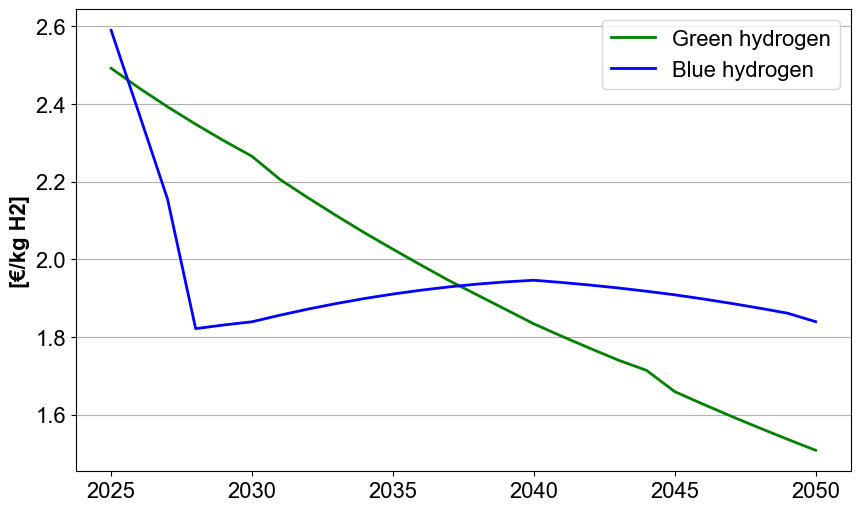

In [118]:
# Plot cost curves of hydrogen production from NGR with CCS and RES
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(lowest_green, color='green', linestyle='solid', label='Green hydrogen')
plt.plot(lcoh_blue, color='blue', linestyle='solid', label='Blue hydrogen')
plt.grid(True, axis='y')
ax.set_axisbelow(True)
#plt.title('Cost curves for green and blue hydrogen production', fontweight='bold')
ax.legend()
plt.ylabel('[€/kg H2]', fontweight='bold')
plt.xticks(ticks=None, labels=np.arange(2025,2051,5))

title = 'Green_and_blue_costs'
plt.savefig(path_plt+title+'.png', transparent = True)


plt.show()

In [ ]:
# Plot cost curve for production costst
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='black', linestyle='solid')
plt.title('Minimal production costs in €/kg_H2')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

# Transport inputs

In [ ]:
availabilities = pd.read_excel(path, sheet_name='General Assumptions', decimal=',', index_col=0)
availabilities

In [ ]:
this_year = int(availabilities.loc['Technology availability']['Value'])
this_year

In [ ]:
AV_pipe_new = int(availabilities.loc['New H2 pipeline - time from FID to commissioning [years]']['Value'])
AV_pipe_new

In [ ]:
AV_pipe_retro = int(availabilities.loc['Retrofit H2 pipeline - availability from now [years]']['Value'])
AV_pipe_retro

In [ ]:
AV_pipe_co2 = int(availabilities.loc['New CO2 pipeline - time from FID to commissioning [years]']['Value'])
AV_pipe_co2

In [ ]:
AV_LH2 = int(availabilities.loc['LH2 shipping - availability']['Value'])
AV_LH2

In [ ]:
AV_NH3 = int(availabilities.loc['Ammonia shipping - availability']['Value'])
AV_NH3

In [ ]:
pipe_retro_off = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Retrofit_pipeline_costs_off.csv", delimiter=';', index_col= 0)
pipe_retro_off

In [ ]:
pipe_new_off = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/New_pipeline_costs_off.csv", delimiter=';', index_col=0)
pipe_new_off

In [ ]:
LH2 = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Lh2_transport_costs.csv", delimiter=';', index_col=0)
LH2

In [ ]:
NH3 = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LNH3_transport_costs.csv", delimiter=';', index_col=0)
NH3

# Minimal transport costs

In [ ]:
def choose_minimal_transport_costs():

    if year < this_year + AV_pipe_new:
        result = min(TC_LH2, TC_NH3)

    elif year < this_year + AV_pipe_retro:
        result = min(TC_pipe_new, TC_LH2, TC_NH3)
    else:
        result = min(TC_pipe_new, TC_pipe_retro, TC_LH2, TC_NH3)


    return result

In [ ]:
def choose_minimal_transport_costs_tech():


    if  year < this_year + AV_pipe_new:
        if min(TC_LH2, TC_NH3) == TC_LH2:
            result = 'LH2'
        else: result = 'NH3'

    elif year < this_year + AV_pipe_retro:
        if min(TC_pipe_new, TC_LH2, TC_NH3) == TC_LH2:
            result = 'LH2'
        elif min(TC_pipe_new, TC_LH2, TC_NH3) == TC_NH3:
            result = 'NH3'
        else:
            result = 'New pipeline'
    else:
        if min(TC_pipe_new, TC_pipe_retro, TC_LH2, TC_NH3) == TC_LH2:
            result = 'LH2'
        elif min(TC_pipe_new, TC_pipe_retro, TC_LH2, TC_NH3) == TC_NH3:
            result = 'NH3'
        elif (TC_pipe_new, TC_pipe_retro, TC_LH2, TC_NH3) == TC_pipe_new:
            result = 'New pipeline'
        else:
            result = 'Retrofit pipeline'


    return result

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Minimal_offshore_transport_costs', 'Technology'])
result.index.name = 'Years'

In [ ]:
for year in years:

    # get all costs
    TC_pipe_new = float(pipe_new_off.loc[year]['New_Pipeline_costs_off'])

    TC_pipe_retro = float(pipe_retro_off.loc[year]['Retrofit_pipeline_costs_off'])

    TC_LH2 = float(LH2.loc[year]['LH2_transport_costs'])

    TC_NH3 = float(NH3.loc[year]['LNH3_transport_costs'])

    result.Minimal_offshore_transport_costs.loc[year] = choose_minimal_transport_costs()
    result.Technology.loc[year] = choose_minimal_transport_costs_tech()

result

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Reference Results']

result.to_excel(writer, sheet_name='Reference Results', index=False, startcol=ws.max_column)
book.save(path)
book.close()

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Minimal_offshore_transport_costs'])
result.index.name = 'Years'

In [ ]:
for year in years:

    # get all costs
    TC_pipe_new = float(pipe_new_off.loc[year]['New_Pipeline_costs_off'])

    TC_pipe_retro = float(pipe_retro_off.loc[year]['Retrofit_pipeline_costs_off'])

    TC_LH2 = float(LH2.loc[year]['LH2_transport_costs'])

    TC_NH3 = float(NH3.loc[year]['LNH3_transport_costs'])

    result.Minimal_offshore_transport_costs.loc[year] = choose_minimal_transport_costs()

result

In [ ]:
# Create csv file from results dataframe
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'Minimal_offshore_transport_costs.csv')
result.to_csv(output_file, sep=';')

In [ ]:
# Create csv file from results dataframe
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/Results'
output_file = os.path.join(path, 'Results.xlsx')
result.to_excel(output_file, sheet_name='Minimal_offshore_transport_costs')

## Plot transport costs

In [ ]:
# Plot cost curve for seaborne transport
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='cyan', linestyle='dashed')
plt.title('Cost curve for transport')
plt.legend(['Minimal transport costs in €/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

NameError: name 'LH2' is not defined

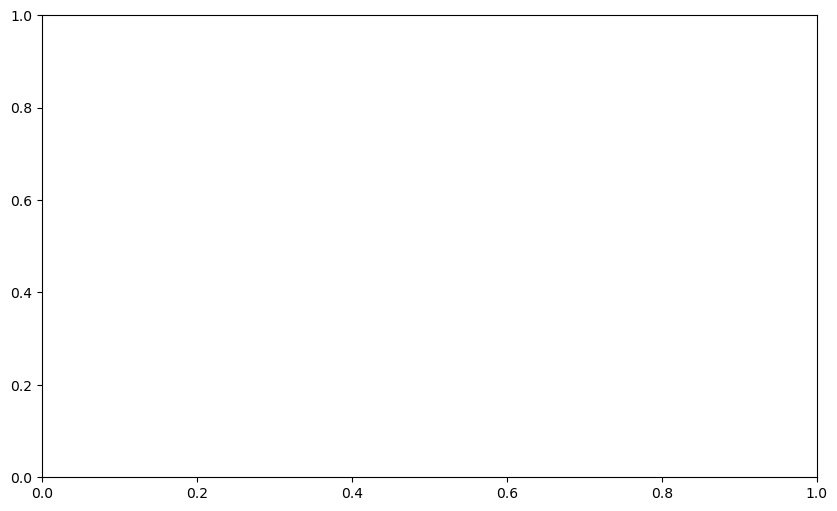

In [52]:
# Plot cost curves of hydrogen transport
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(LH2, color='blue', linestyle='solid', label='LH2')
plt.plot(NH3, color='yellow', linestyle='solid', label='NH3')
plt.plot(pipe_new_off, color='violet', linestyle='solid', label='New pipeline')
plt.plot(pipe_retro_off, color='pink', linestyle='solid', label='Retrofit pipeline')

plt.axvline(x=this_year + AV_pipe_new, color='violet', linestyle = '--', label= 'New pipeline available')
plt.axvline(x=this_year + AV_pipe_retro, color='pink', linestyle = '--', label= 'Retrofit pipeline available')


plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.title('Hydrogen transport costs [€/kg H2]', fontweight='bold')
ax.legend()
plt.ylabel('Cost')

title = 'NH3_emissions_w_reconversion'
plt.savefig(path_plt+title+'.png', transparent = True)

plt.show()

# Minimal supply costs


In [ ]:
mpc = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Minimal_production_costs.csv", delimiter=';',
    decimal=',', index_col=0)
mpc

In [ ]:
mtc = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Minimal_offshore_transport_costs.csv", delimiter=';',
    decimal=',', index_col=0)
mtc

In [ ]:
def calculate_total_supply_costs():
    result = PC + TC

    return result

In [ ]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Total_supply_costs'])
result.index.name = 'Years'

for year in years:
    # get all costs

    PC = float(mpc.loc[year]['Minimal_production_costs'])
    TC = float(mtc.loc[year]['Minimal_offshore_transport_costs'])


    # calculate costs of specific year
    result.Total_supply_costs.loc[year] = calculate_total_supply_costs()

result

In [ ]:
# Create csv file from results dataframe
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'Minimal_supply_costs.csv')
result.to_csv(output_file, sep=';')

In [ ]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/Results'
output_file = os.path.join(path, 'Results.xlsx')
result.to_excel(output_file, sheet_name='Minimal_supply_costs')

In [ ]:
# Plot cost curve for total supply costs
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.plot(result, color='cyan', linestyle='dashed')
plt.title('Supply costs costs in €/kg_H2')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()


In [ ]:
# Cost breakdown for H2 supply
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
x = np.arange(2025, 2051, step=5)

PC = (mpc.loc[::5]['Minimal_production_costs']).apply(pd.to_numeric)
TC = mtc.loc[::5]['Minimal_offshore_transport_costs'].apply(pd.to_numeric)
width = 2       # the width of the bars: can also be len(x) sequence


TC_plt = plt.bar(x,TC, width, label='Transport', bottom= PC)
PC_plt = plt.bar(x,PC, width, label='Production')

plt.title('Lowest H2 supply costs from Norway to Germany', fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Cost [€/kg H2]')
plt.xlabel('Years')
plt.show()


In [ ]:
mtc

# Write to excel

In [ ]:
# export Results dataframe to excel


path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/Results/Results.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a')
book = load_workbook(fn)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

mtc.to_excel(writer, sheet_name='transport')
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/Results/Results.xlsx')
